# Statistical Inference - Distribution of the Mean


## Distribution of the Mean

In this notebook we first investigate the distribution of the mean of a dataset, we simulate several hypothesis tests, and finish with exploring the central limit theorem. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

### What Is Z-Score?

__Z-score__ is a statistical measurement that describes a value's relationship to the mean of a group of values. 

Z-score is measured in terms of standard deviations from the mean. 

- If a Z-score is 0, it indicates that the data point's score is identical to the mean score. 
- A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. 
- Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

__Formula:__ $Z=\frac{x-\mu}{\sigma}$

**numpy.random.standard_normal()** can generate the random samples from standard normal distribution and return the random samples as numpy array.

> **Stntax:** numpy.random.standard_normal(size)

Consider a dataset of 100 points. The data are drawn from a normal distribution with mean 4 and standard deviation 2. As we noticed before, the sample mean of the 100 data points almost always differs from 4. And every time we generate a new set of 100 points, the mean will be somewhat different. 

In [3]:
for i in range(5):
    a = 2 * rnd.standard_normal(100) + 4
    print('mean a:', np.mean(a))

mean a: 4.007037655078552
mean a: 4.111790906535259
mean a: 4.235082075478232
mean a: 4.051561352903856
mean a: 4.226563899255944


In fact, the mean of the dataset itself can be considered as a random variable with a distribution of its own. 

In [4]:
a = np.array([[1, 2], [3, 4]])
np.mean(a)


2.5

In [5]:
np.mean(a, axis=0)


array([2., 3.])

In [6]:
np.mean(a, axis=1)

array([1.5, 3.5])

In [7]:
a1 = np.zeros((2, 512*512), dtype=np.float32)
print(a1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
a1[0, :] = 1.0
a1[1, :] = 0.1
print(a1)
np.mean(a1)

[[1.  1.  1.  ... 1.  1.  1. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


0.54999924

In [9]:
np.mean(a1, dtype=np.float64)  # the mean in float64 is more accurate

0.5500000007450581

### Sample standard deviation

The sample standard deviation $s_n$ of a dataset of $n$ values is defined as

$s_n = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$

and can be computed with the `std` function of the `numpy` package. 

By default, the `std` function devides the sum by $n$ rather than by $n-1$. 

To divide by $n-1$, as we want for an unbiased estimate of the standard deviation, specify the keyword argument `ddof=1` in the `np.std` function.

> **ddof**: *Delta Degrees of Freedom*. The divisor used in calculations is **N - ddof**.

In [10]:
a2 = np.array([[1, 2], [3, 4]])
np.std(a2)

1.118033988749895

In [11]:
np.std(a2, axis=0)

array([1., 1.])

In [12]:
np.std(a2, axis=1)

array([0.5, 0.5])

In [13]:
print(a1)
np.std(a1)

[[1.  1.  1.  ... 1.  1.  1. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


0.45000005

In [14]:
np.std(a1, dtype=np.float64)  # the Standard deviation in float64 is more accurate

0.4499999992549418

### Exercise 1. Histogram of the means of datasets with 100 values

Generate 1000 datasets each with 100 values drawn from a normal distribution with mean 4 and standard deviation 2; use a seed of 22. 
1. Compute the mean of each dataset and store them in an array of length 1000. 
2. Compute the mean of the means and the standard deviation of the means, and print them to the screen. 
3. Draw a boxplot of the means. 
4. In a separate figure, draw a histogram of the means. Make sure the vertical axis of the boxplot and the horizontal axis of the histogram extend from 3 to 5.

In [15]:
rnd.seed(22)
# 1. Compute the mean of each dataset and store them in an array of length 1000.

mean_of_data = np.mean(2 * rnd.standard_normal((1000, 100)) + 4, 1)
print(mean_of_data)
print('The mean of the means is:', np.mean(mean_of_data))


[3.8926492  4.55198773 4.00702273 4.31973341 4.06978531 3.83915782
 3.94303363 3.88773111 4.0513761  3.93570047 4.04519897 4.12125415
 3.7887193  3.79928323 3.82064657 3.87012195 4.01280816 3.59112654
 3.90256443 3.84983698 3.96263176 3.88543679 4.12976702 4.45299017
 3.9374921  3.86630504 3.80122086 3.70082945 4.14258903 4.06252609
 4.07289172 3.66055854 4.15086416 3.96858039 4.04422869 3.98067734
 3.95948657 4.19094415 4.129086   4.07012664 3.93273368 4.10343865
 3.8439891  4.01102013 3.6872943  3.92808078 4.17855649 4.21947592
 3.78302908 4.23337442 4.09489706 3.88035531 3.83016158 3.98030587
 3.79070313 4.25648887 3.88606247 4.14525846 3.83532694 3.8367266
 4.11340281 4.41137859 4.0812003  4.12213222 4.2257918  4.39456744
 3.98833454 4.11481136 4.11053058 3.98183163 3.78289495 4.14521795
 4.06414444 4.26418927 4.07816456 4.33827518 3.84463256 3.80563701
 4.03162744 4.0384431  4.23998166 3.91333481 3.59834106 4.00650716
 3.82880325 3.77792411 3.73378218 4.07892275 4.54407229 4.15957

In [16]:
# 2. Compute the mean of the means and the standard deviation of the means, and print them to the screen.

print('The standard deviation of the means is:', np.std(mean_of_data, ddof=1))

The standard deviation of the means is: 0.1904854817672302


(3.0, 5.0)

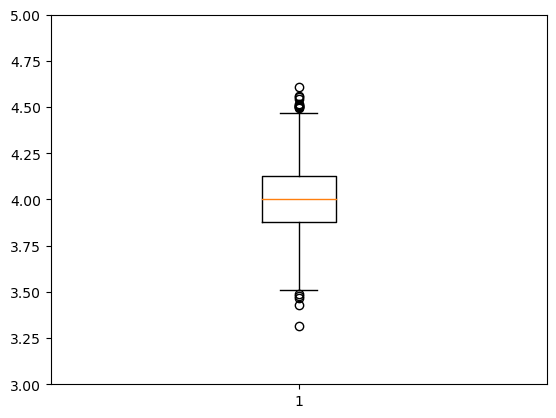

In [17]:
# 3. Draw a boxplot of the means.

plt.figure()
plt.boxplot(mean_of_data)
plt.ylim(3, 5)

(3.0, 5.0)

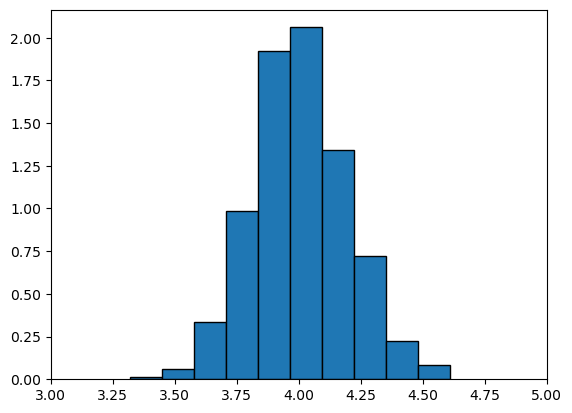

In [18]:
# 4. In a separate figure, draw a histogram of the means. Make sure the vertical axis of the boxplot and 
#    the horizontal axis of the histogram extend from 3 to 5.

plt.figure()
plt.hist(mean_of_data, density=True, edgecolor='black')
plt.xlim(3,5)

### Exercise 2. Histogram of the means of datasets with 1000 values

- Repeat Exercise 1 but now generate 1000 datasets each with 1000 values (rather than 100 values) drawn from the same normal distribution with mean 4 and standard deviation 2, and again with a seed of 22. 
- Make sure the vertical axis of the boxplot and the horizontal axis of the histogram extend from 3 to 5, so that the graphs can be compared to the graphs you created in the previous exercise. 
- Is the spread of the mean much smaller now as compared to the datasets consisting of only 100 values?

In [19]:
rnd.seed(22)
mean_of_data2 = np.mean(2 * rnd.standard_normal((1000, 1000)) + 4, 1)
print('The mean of the means is:', np.mean(mean_of_data2))
print('The standard deviation of the means is:', np.std(mean_of_data2, ddof=1))

The mean of the means is: 4.001281312353626
The standard deviation of the means is: 0.0654148250988205


(3.0, 5.0)

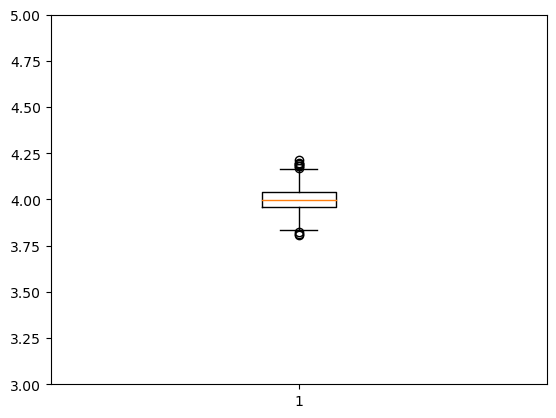

In [20]:
plt.figure()
plt.boxplot(mean_of_data2)
plt.ylim(3,5)

(3.0, 5.0)

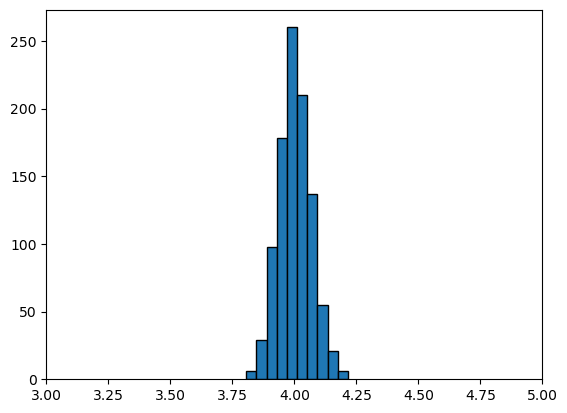

In [21]:
plt.figure()
plt.hist(mean_of_data2, edgecolor='black')
plt.xlim(3, 5)

### Sample standard deviation of the sample mean

The histogram of the means looks like the bell-shaped curve of a Normal distribution, but you may recall that it is actually a Student's $t$-distribution, also simply called a $t$-distribution. 

A $t$-distribution arises when estimating the mean of a normally distributed variable in situations where the sample size is relatively small and the standard deviation is unknown and needs to be estimated from the data. 

The sample mean of a dataset of $n$ values is commonly written as $\overline{x}_n$, while the sample standard deviation is written as $s_n$ (as defined above). 

We are computing the sample standard deviation of the sample means, which we write as $\hat{s}_n$ for a dataset of size $n$. 

Theoretically, the value of the sample standard deviation of the sample mean $\hat{s}_n$ is related to the sample standard deviation as 

$\hat{s}_n = s_n / \sqrt{n}$

### Percentiles of $t$-distribution

You may recall that the 90% interval around the mean for a Normally distributed variable runs from $\mu-1.64\sigma$ to $\mu+1.64\sigma$. 

In other words, 5% of the data is expected to lie below $\mu-1.64\sigma$ and 5% of the data is expected to lie above $\mu+1.64\sigma$. 

What now if you forgot it is $1.64\sigma$ to the left and right of the mean? Or what if you want to know the value for some other percentile. 

You may look that up in a table in a Statistics book (or on the web), or use the __percent point function__ `ppf`, which is part of any statistical distribution function defined in the `scipy.stats` package. 

The `ppf` function is the **inverse of the cumulative distribution function**. 

For example, `ppf(0.05)` returns the value of the data such that the cumulative distribution function is equal to 0.05 at the returned value. 

To find the 5% and 95% values, type (recall that by default the `norm` distribution has mean zero and standard deviation 1; you can specify different values with the `loc` and `scale` keyword arguments, respectively).

In [22]:
from scipy.stats import norm
xvalue_05 = norm.ppf(0.05)
xvalue_95 = norm.ppf(0.95)

print('5% limit:', xvalue_05)
print('95% limit:', xvalue_95)


5% limit: -1.6448536269514729
95% limit: 1.6448536269514722


In [23]:
print('check if it works for 5%:', norm.cdf(xvalue_05))
print('check if it works for 95%:', norm.cdf(xvalue_95))


check if it works for 5%: 0.049999999999999975
check if it works for 95%: 0.95


In [24]:
# Next, specify a mean and standard deviation
xvalue_05_musig = norm.ppf(0.05, loc=20, scale=10) # mu = 20, sigma = 10
print('5% limit with mu=20, sig=10:', xvalue_05_musig)
print('check:', norm.cdf(xvalue_05_musig, loc=20, scale=10))

5% limit with mu=20, sig=10: 3.5514637304852705
check: 0.049999999999999975


A similar function exists for the $t$ distribution. 

The $t$-distribution takes one additional argument: the number of degrees of freedom, which is equal to the number of data points minus 1. 

> Consider a sample with 40 data points, a sample mean of 20, and a sample standard deviation of the mean of 2, then the 5 and 95 percentiles are

In [25]:
from scipy.stats import t
xvalue_05 = t.ppf(0.05, 39, loc=20, scale=2)
xvalue_95 = t.ppf(0.95, 39, loc=20, scale=2)
print('5% limit:  ',xvalue_05)
print('95% limit: ',xvalue_95)


5% limit:   16.6302497610052
95% limit:  23.369750238994797


In [26]:
print('check if it works for 5%:', t.cdf(xvalue_05, 39, loc=20, scale=2))
print('check if it works for 95%:', t.cdf(xvalue_95, 39, loc=20, scale=2))

check if it works for 5%: 0.050000000215266564
check if it works for 95%: 0.9499999997847333


### Exercise 3. Count the number of means outside 95 percentile

1. Generate 1000 datasets each with 100 values drawn from a normal distribution with mean 4 and standard deviation 2 and arrange the data into a variable, **data**. 
2. For each dataset, evaluate whether the sample mean is within the 95 percentile of the $t$-distribution around the true mean of 4 (the standard deviation of the sample mean is different every time, of course). 
3. Count how many times the sample mean is outside the 95 percentile around the true mean of the $t$ distribution. If the theory is correct, it should, of course, be the case for about 5% of the datasets. Try five different seeds and report the percentage of means in the dataset that is outside the 95 percentile around the true mean. 

In [27]:
from scipy.stats import t

1. Generate 1000 datasets each with 100 values drawn from a normal distribution with mean 4 and standard deviation 2 and arrange the data into a variable, **data**. 

> data = 2.0 * rnd.standard_normal((1000, 100)) + 4.0

2. For each dataset, evaluate whether the sample mean is within the 95 percentile of the  $𝑡$-distribution around the true mean of 4 (the standard deviation of the sample mean is different every time, of course).

>  for i in range(1000): \
        low = t.ppf(0.025, 99, loc=4, scale = sighat[i]) \
        high = t.ppf(0.975, 99, loc=4, scale = sighat[i]) \
        if (mean[i] < low) or (mean[i] > high): count += 1

3. Count how many times the sample mean is outside the 95 percentile around the true mean of the $𝑡$-distribution. If the theory is correct, it should, of course, be the case for about 5% of the datasets. Try five different seeds and report the percentage of means in the dataset that is outside the 95 percentile around the true mean.

In [28]:
for s in [22, 32, 42, 52, 62]:
    rnd.seed(s)
    data = 2.0 * rnd.standard_normal((1000, 100)) + 4.0
    mean = np.mean(data, 1)
    sighat = np.std(data, axis=1, ddof=1) / np.sqrt(100)
    count = 0
    for i in range(1000):
        low = t.ppf(0.025, 99, loc=4, scale=sighat[i])
        high = t.ppf(0.975, 99, loc=4, scale=sighat[i])
        if (mean[i] < low) or (mean[i] > high): count += 1
    print('percentage of datasets where sample mean is outside 95 percentile:', count * 100 / 1000)

percentage of datasets where sample mean is outside 95 percentile: 4.0
percentage of datasets where sample mean is outside 95 percentile: 5.8
percentage of datasets where sample mean is outside 95 percentile: 6.2
percentage of datasets where sample mean is outside 95 percentile: 5.9
percentage of datasets where sample mean is outside 95 percentile: 5.7


### Exercise 4. $t$ test on dataset of 20 values

1. Generate 20 datapoints from a Normal distribution with mean 39 and standard deviation 4. Use a seed of 2. 

2. Compute and report the sample mean and sample standard deviation of the dataset and the sample standard deviation of the sample mean.

In [29]:
rnd.seed(2)
# 1
data = 4 * rnd.standard_normal(20) + 39

In [30]:
# 2
mu = np.mean(data)
sig = np.std(data, ddof=1)
sighat = np.std(data, ddof=1) / np.sqrt(20)

In [31]:
# Print 
print('mean of the data:', mu)
print('std of the data:', sig)
print('std of the mean:', sighat)

mean of the data: 38.16274004693891
std of the data: 4.460326920868606
std of the mean: 0.9973594196934527


### Exercise 5. 

If you computed it correctly, the mean of the 20 data points generated above is 38.16. 

Somebody now claims that the 20 datapoints are taken from a distribution with a mean of 40. You are asked to decide wether the true underlying mean could indeed be 40. 

In statistical terms, you are asked to perform a Hypothesis test, testing the null hypothesis that the mean is 40 against the alternative hypothesis that the mean is not 40 at significance level 5%.

Hence, you are asked to do a two-sided $t$-test. All you can do in Hypothesis testing it trying to reject the null hypothesis, so let's try that.

Here we will visualize the $t$-test. We reject the null hypothesis if the sample mean is outside the 95% interval around the mean of the corresponding $t$-distribution. 

If the mean is inside the 95% interval, we can only conclude that there is not enough evidence to reject the null hypothesis. 

- Draw the probability density function of a $t$-distribution with mean 40 and standard deviation equal to the sample standard deviation of the sample mean you computed above. 

- Draw red vertical lines indicating the left and right limits of the 95% interval around the mean. 

- Draw a heavy black vertical line at the position of the sample mean you computed above. 

- Decide whether you can reject the null hypothesis that the mean is 40 and add that as a title to the figure.

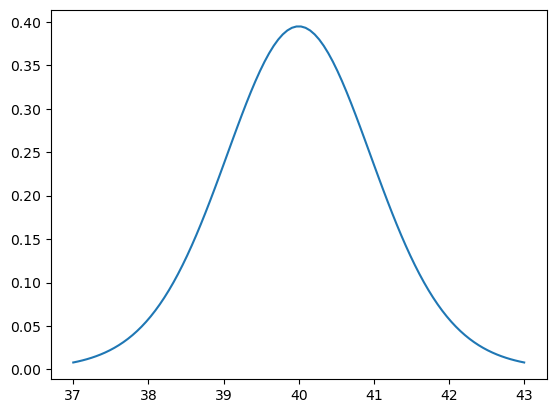

In [32]:
x = np.linspace(37, 43, 100)
y = t.pdf(x, 19, loc=40, scale=sighat)
plt.plot(x, y)


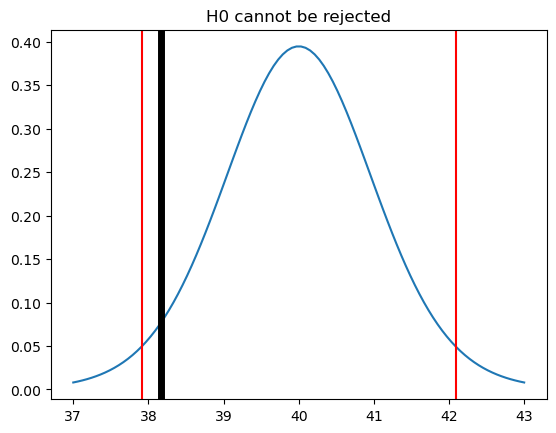

In [33]:
x = np.linspace(37, 43, 100)
y = t.pdf(x, 19, loc=40, scale=sighat)
plt.plot(x, y)
perc025 = t.ppf(0.025, 19, loc=40, scale=sighat)
perc975 = t.ppf(0.975, 19, loc=40, scale=sighat)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu, color='k', lw=5)
plt.title('H0 cannot be rejected');



Load the data set of experiments on wooden beams stored in the file `douglas_data.csv`. 

1. consider the first __20__ measurements of the bending strength. 

2. Compute the sample mean and the standard deviation of the sample mean. 

The manufacturer claims that the mean bending strength is only 50 N/mm$^2$. 

3. Perform a $t$-test (significance level 5%) with null hypothesis that the mean is indeed 50 N/mm$^2$ and alternative hypothesis that the mean is not 50 N/mm$^2$ using the approach applied in Exercise 3.

In [74]:
from pandas import read_csv
import pandas as pd

# Add your code
w = read_csv('douglas_data.csv', skiprows=[1], skipinitialspace=True)
D = pd.DataFrame(w)
Df = D.head(20)
Df

,sample,moisture,knotratio,treering,Edyn,density,beamheight,Estat,bstrength
0,DO1,13.3,0.04,3.00,14053,675,101,15452,58.40
1,DO2,12.0,0.16,2.50,20611,474,100,17272,74.35
2,DO3,12.8,0.14,3.88,18846,596,99,18456,49.82
3,DO4,11.7,0.13,2.02,18587,582,100,18940,78.52
4,DO5,12.0,0.16,2.13,19299,678,100,16864,79.31
5,DO6,12.4,0.04,2.98,21695,595,100,19440,64.34
6,DO7,12.5,0.32,3.67,16523,592,100,16152,58.19
7,DO8,11.5,0.07,3.67,18333,634,101,18480,88.39
8,DO9,13.1,0.19,2.44,18628,592,101,14604,33.02
9,DO10,11.7,0.25,3.00,15683,540,101,16628,60.28


In [75]:
m = Df.bstrength.mean()
print('Sample mean for bending strength of 20 samples is:', m)
std = Df.bstrength.std()
print('Standard deviation for bending strength for 20 samples is:', std)

sighat = np.std(Df.bstrength, ddof=1) / np.sqrt(20)
print('Standard deviation of the sample mean:', sighat)

Smaple mean for bending strength 20 samples is: 69.37100000000001
Standard deviation for bending strength for 20 samples is: 15.695445500962506
Standard deviation of the sample mean: 3.5096083077295406


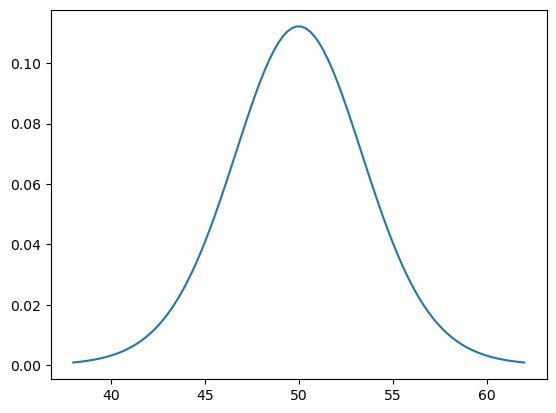

In [76]:
x = np.linspace(38, 62, 100)
y = t.pdf(x, 19, loc=50, scale=sighat)
plt.plot(x, y)


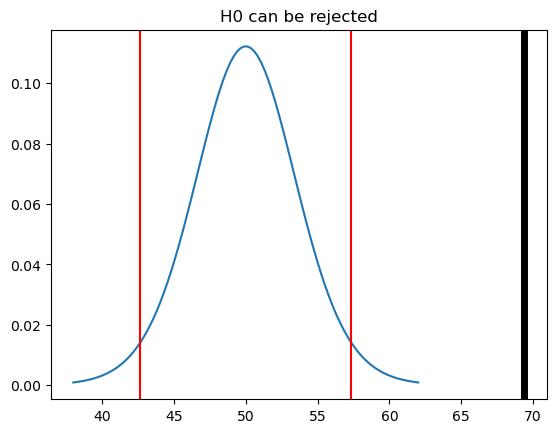

In [77]:
x = np.linspace(38, 62, 100)
y = t.pdf(x, 19, loc=50, scale=sighat)
plt.plot(x, y)

perc025 = t.ppf(0.025, 19, loc=50, scale=sighat)
perc975 = t.ppf(0.975, 19, loc=50, scale=sighat)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(m, color='k', lw=5)
plt.title('H0 can be rejected');

**For sample data = 20, we can reject the null hypothesis because the sample mean is outside the 95% interval of the mean for the corresponding t-distribution**

4. Repeat the $t$-test above but now with all the measurements of the bending strength. Do you reach the same conclusion?

In [81]:
from pandas import read_csv

# Add your code
count = D.bstrength.count()
m = D.bstrength.mean()
print('Sample mean for bending strength(all data)is:', m)
std = D.bstrength.std()
print('Standard deviation for bending strength is:', std)

sighat = np.std(D.bstrength, ddof=1) / np.sqrt(count)


print('Standard deviation of the mean sample(all data) :', sighat)

Sample mean for bending strength(all data)is: 48.65050561797753
Standard deviation for bending strength is: 17.048027146939468
Standard deviation of the mean sample(all data) : 0.9035436317023355


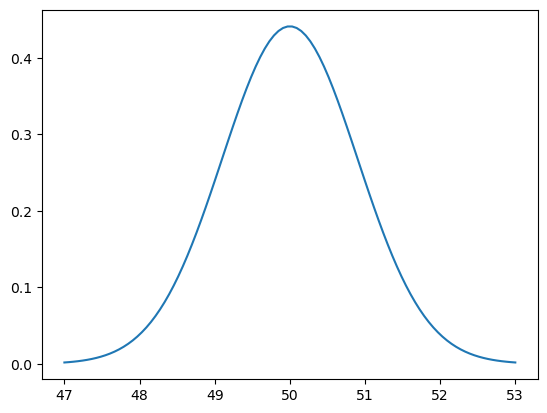

In [79]:
x = np.linspace(47, 53, 100)
y = t.pdf(x, count-1, loc=50, scale=sighat)
plt.plot(x, y)

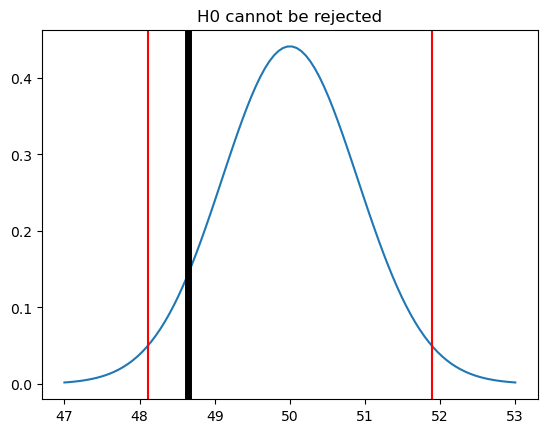

In [80]:
x = np.linspace(47, 53, 100)
y = t.pdf(x, count-1, loc=50, scale=sighat)
plt.plot(x, y)

perc025 = t.ppf(0.025, 19, loc=50, scale=sighat)
perc975 = t.ppf(0.975, 19, loc=50, scale=sighat)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(m, color='k', lw=5)
plt.title('H0 cannot be rejected');

**For all sample data, we cannot reject the null hypothesis because the sample mean is within the 95% interval range of the mean for the corresponding t-distribution**

## Central Limit Theorem

So far we looked at the distribution of the sample mean of a dataset while we knew that the data was taken from a normal distribution (except for the wooden beam data, but that looked very much like a Normal distribution). 

Such a sample mean has a Student $t$-distribtion, which approaches the Normal distribution when the dataset is large. 

Actually, 100 datapoints is already enough to approach the Normal distribution fairly closely. 

You may check this by comparing, the percent point function `ppf` of a Normal distribution with a $t$-distribution with 99 degrees of freedom, or by simply plotting the pdf of both distributions.

In [147]:
print('95 percentile Standard Normal:  ',norm.ppf(0.95))
print('95 percentile t-dist with n=99: ',t.ppf(0.95,99)) 

95 percentile Standard Normal:   1.6448536269514722
95 percentile t-dist with n=99:  1.6603911559963895


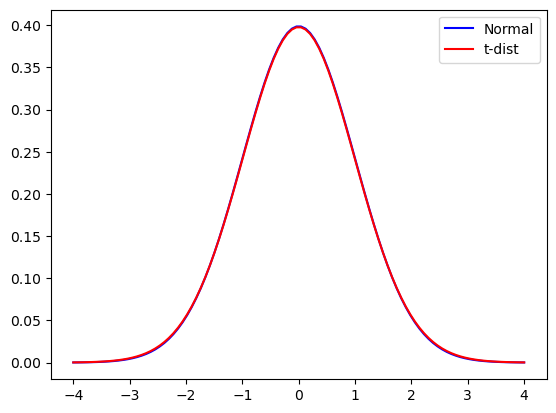

In [150]:
x2 = np.linspace(-4,4,100)
y1 = norm.pdf(x2)
y2 = t.pdf(x2,99)
plt.plot(x2,y1,'b',label='Normal')
plt.plot(x2,y2,'r',label='t-dist')
plt.legend();

The Central limit theorem now states that the distribution of the sample mean approaches the Normal distribution in the limit even if the dataset is drawn from an entirely different distribution! 

We are going to test this theorem by drawing numbers from a Gamma distribution. The Gamma distribution is a skewed distribution and takes a shape parameter $k$ and a scale parameter $\theta$, and is defined for $x>0$. Details on the Gamma distribution can be found. 

Let's set the shape parameter equal to 2 and the scale parameter equal to 1. When the scale parameter is equal to 1, the mean is equal to the shape parameter. 

The pdf of the Gamma distribution for these values is shown below. The mean is indicated with the red vertical line.

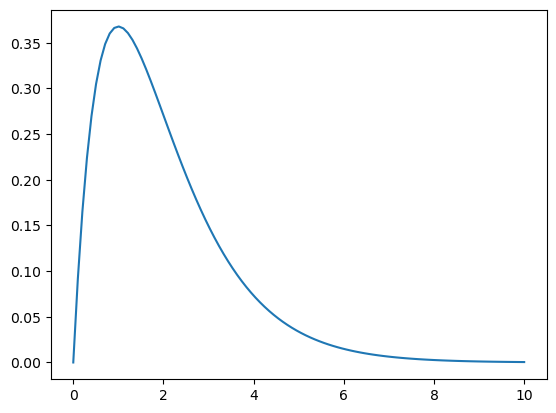

In [151]:
from scipy.stats import gamma

x3 = np.linspace(1e-6, 10, 100)
y3 = gamma.pdf(x3, 2, scale=1)

plt.plot(x3, y3)


Random numbers may be drawn from any distribution in the `scipy.stats` package with the `rvs` function. 

Here, we draw 1000 numbers and add the histogram to the previous figure

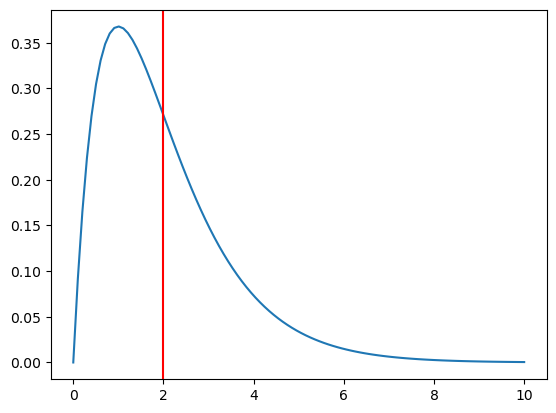

In [152]:
x3 = np.linspace(1e-6, 10, 100)
y3 = gamma.pdf(x3, 2)
plt.plot(x3, y3)
plt.axvline(2, color='r')

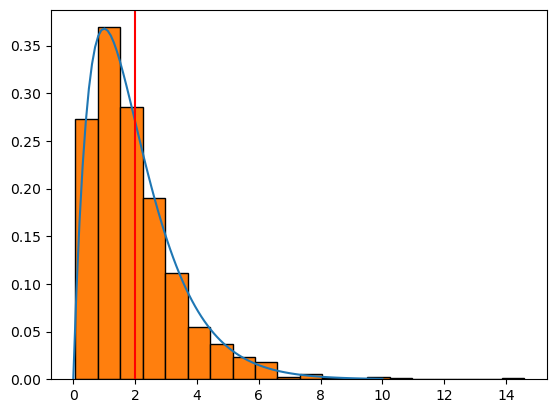

In [153]:
x3 = np.linspace(1e-6, 10, 100)
y3 = gamma.pdf(x3, 2)
plt.plot(x3, y3)
plt.axvline(2, color='r')
data = gamma.rvs(2, size=1000)
plt.hist(data, bins=20, density=True, edgecolor='black');

### Exercise 6. Explore Central Limit Theorem for Gamma Distribution

1. Generate $N$ datasets of 20 numbers randomly drawn from a Gamma distribution with shape parameter equal to 2 and scale equal to 1. 
2. Draw a histogram of the means of the $N$ datasets using 20 bins. 
3. On the same graph, draw the pdf of the Normal distribution using the mean of means and sample standard deviation of the means.
4. Choose the limits of the $x$-axis between 0 and 4. 
5. Make 3 graphs, for $N=100,1000,10000$ and notice that the distribution starts to approach a Normal distribution. 
6. Add a title to each graph stating the number of datasets.

In [102]:
from scipy.stats import norm, gamma

1. >  data = gamma.rvs(2, size=(N, 20))

2. >    plt.figure() \
        plt.hist(mean_of_data, bins=20, density=True, edgecolor='black')

3.  > mu = np.mean(mean_of_data) \
    sig = np.std(mean_of_data, ddof=1) \
    x = np.linspace(0, 4, 100) \
    y = norm.pdf(x, loc=mu, scale=sig) \
    plt.plot(x, y, 'r') 

5. > for N in [100, 1000, 10000]:

6. > plt.title('N=' + str(N))

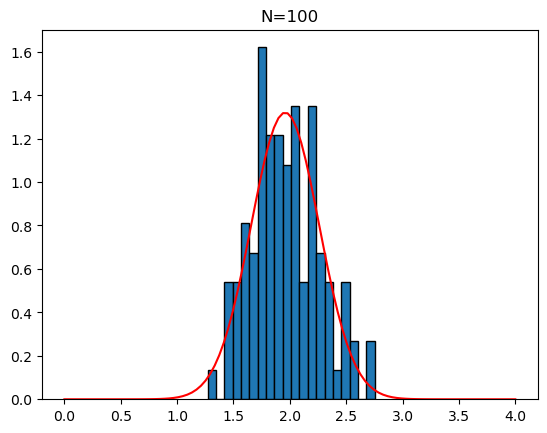

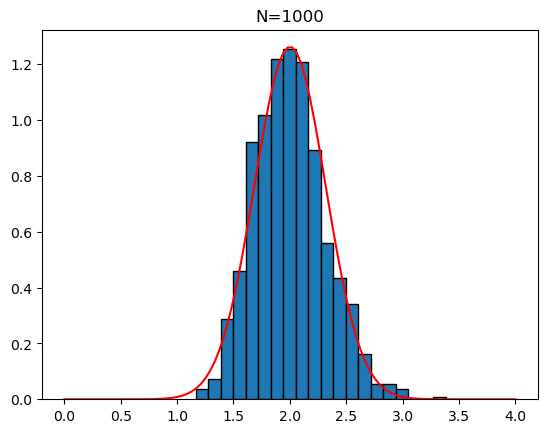

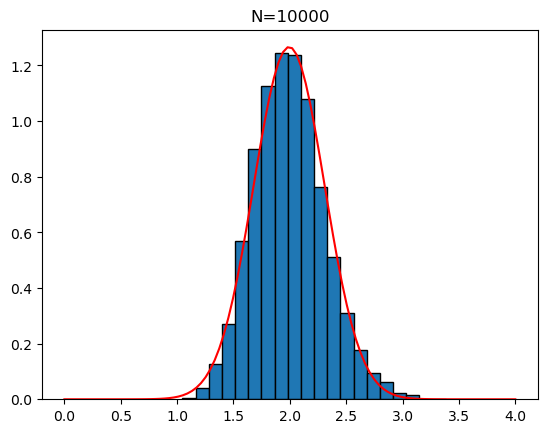

In [103]:
# Combined Program

for N in [100, 1000, 10000]:
    data = gamma.rvs(2, size=(N, 20))
    mean_of_data = np.mean(data, 1)

    plt.figure()
    plt.hist(mean_of_data, bins=20, density=True, edgecolor='black')

    mu = np.mean(mean_of_data)
    sig = np.std(mean_of_data, ddof=1)
    x = np.linspace(0, 4, 100)
    y = norm.pdf(x, loc=mu, scale=sig)
    plt.plot(x, y, 'r')
    plt.title('N=' + str(N))